# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns

## Load the Data

In [141]:
df = pd.read_csv('Traffic_Accidents.csv')
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


This dataset contains 28852 rows and 30 columns.

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [18]:
df.shape

(52000, 30)

In [19]:
df.dtypes

,0
Unnamed: 0,int64
Accident_Index,object
Location_Easting_OSGR,float64
Location_Northing_OSGR,float64
Longitude,float64
Latitude,float64
Police_Force,int64
Accident_Severity,int64
Number_of_Vehicles,float64
Number_of_Casualties,int64


In [32]:
df['Accident_Index'].unique()

array(['2.01E+12', '200520D303703', '200501TX20137', ..., '20053102C2156',
       '200501BS70452', '2005160D02810'], dtype=object)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

Remove Unnecessary Columns

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [142]:
# I will dropping the Unnecessary Columns for the hypothesis (WE DONT NEED THEM) (IN MY OPINION)

df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)
df.drop('Time',axis=1,inplace=True)
df.drop('Local_Authority_(District)',axis=1,inplace=True)
df.drop('Local_Authority_(Highway)',axis=1,inplace=True)
df.drop('1st_Road_Number',axis=1,inplace=True)
df.drop('2nd_Road_Number',axis=1,inplace=True)
df.drop('Did_Police_Officer_Attend_Scene_of_Accident',axis=1,inplace=True)
df.drop('LSOA_of_Accident_Location',axis=1,inplace=True)
df.drop('Accident_Index',axis=1,inplace=True)


df.drop('Road_Type',axis=1,inplace=True)
df.drop('Pedestrian_Crossing-Human_Control',axis=1,inplace=True)
df.drop('Pedestrian_Crossing-Physical_Facilities',axis=1,inplace=True)
df.drop('Light_Conditions',axis=1,inplace=True)

df.drop('Road_Surface_Conditions',axis=1,inplace=True)
df.drop('Weather_Conditions',axis=1,inplace=True)


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location_Easting_OSGR   52000 non-null  float64
 1   Location_Northing_OSGR  52000 non-null  float64
 2   Longitude               52000 non-null  float64
 3   Latitude                52000 non-null  float64
 4   Police_Force            52000 non-null  int64  
 5   Accident_Severity       52000 non-null  int64  
 6   Number_of_Vehicles      51198 non-null  float64
 7   Number_of_Casualties    52000 non-null  int64  
 8   Day_of_Week             51463 non-null  float64
 9   1st_Road_Class          51999 non-null  float64
 10  Speed_limit             50959 non-null  float64
 11  2nd_Road_Class          51999 non-null  float64
 12  Urban_or_Rural_Area     51999 non-null  float64
 13  Year                    51999 non-null  float64
dtypes: float64(11), int64(3)
memory usage:

Impute missing data

In [126]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0
Day_of_Week,537
1st_Road_Class,1


In [143]:
df['Number_of_Vehicles']= df['Number_of_Vehicles'].fillna(df['Number_of_Vehicles'].mean())
df['Day_of_Week']= df['Day_of_Week'].fillna(df['Day_of_Week'].mean())
df['Speed_limit']= df['Speed_limit'].fillna(df['Speed_limit'].mean())
df['2nd_Road_Class']= df['2nd_Road_Class'].fillna(df['2nd_Road_Class'].mean())
df['1st_Road_Class']= df['1st_Road_Class'].fillna(df['1st_Road_Class'].mean())
df['Urban_or_Rural_Area']= df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean())
df['Year']= df['Year'].fillna(df['Year'].mean())

In [144]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Day_of_Week,0
1st_Road_Class,0


In [145]:
df.duplicated().sum()

84

In [146]:
df.drop_duplicates(inplace=True)

Encoding

In [147]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Accident_Severity'] = label_encoder.fit_transform(df['Accident_Severity'])

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


I will take all features because I already drop the Unnecessary Columns (unrelevant features)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

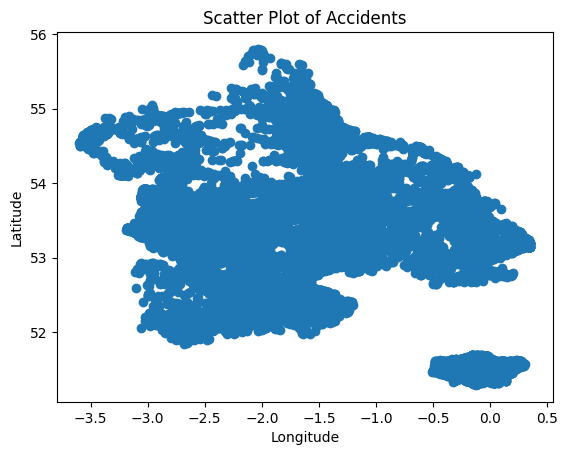

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Accidents')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

Scale the data

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

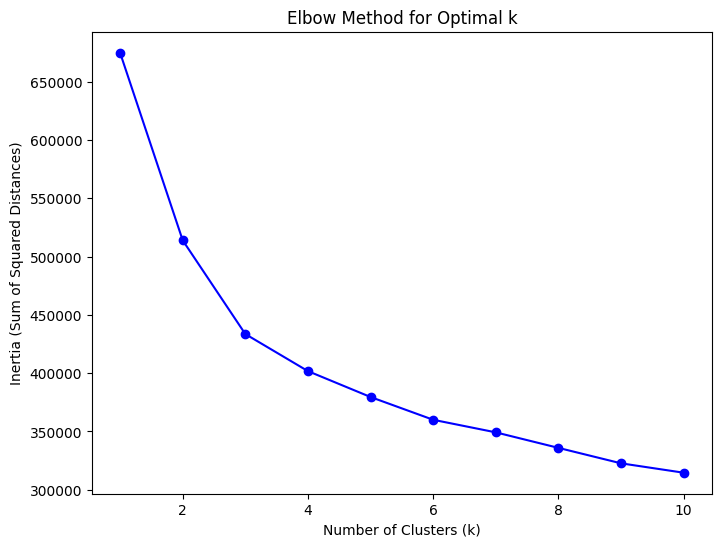

In [153]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [163]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

model = KMeans(n_clusters = 3)
model.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [164]:
from sklearn import metrics
y_pred = model.predict(df)
sc = metrics.silhouette_score(df, y_pred)
print("Silhouette Coefficient:%0.2f" % sc)

Silhouette Coefficient:0.26


## Plot the data points with their predicted cluster center

In [165]:
df_dataframe = pd.DataFrame(df)

Text(0, 0.5, 'SepalWidthCm')

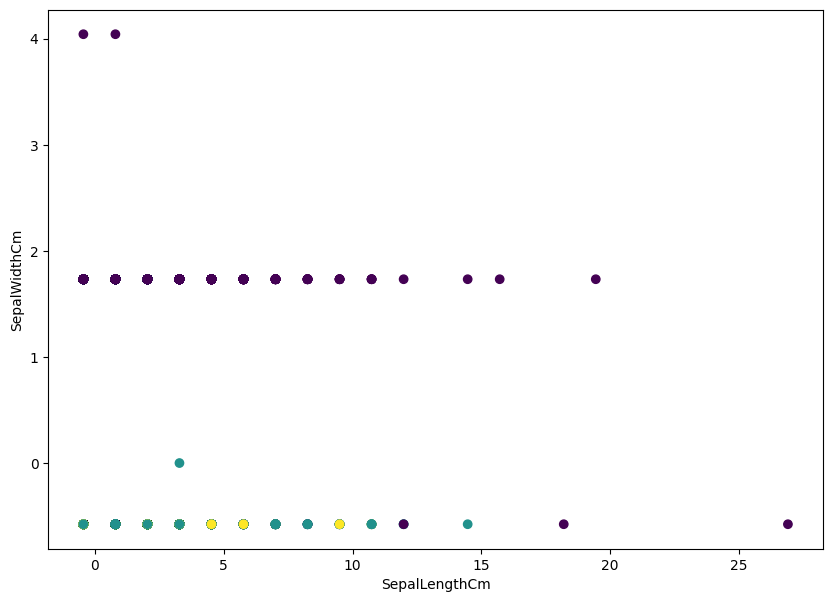

In [166]:
plt.figure(figsize=(10, 7))
plt.scatter(df_dataframe[7], df_dataframe[12], c=y_pred)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

1. Justify Your Feature Selection :

  I used all data beacuse I already remove the unrelavant features for this problem.

2. Number of Clusters Choices:

  I used k = 3 based on the elbow method.

3. Evaluation:

  I used silhouette_score which is a specfic metraic for clustring models.

  for silhouette_score:

- When the score = 0 that means the point in the middle of the clusters.
- and if it negitive that means it is in the miscluster.
- if it = 1 that means the point in the right cluster so it is the best.



4. Improvements and Recommendations:

  I Suggest use another clustring models like DBSCAN and so on. also use another approch to detraimane the K value to get a better result.